## task 1

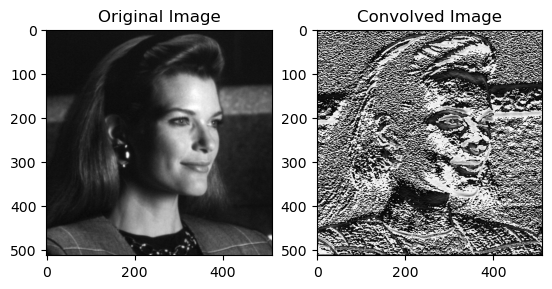

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('Fig0804.png', cv2.IMREAD_GRAYSCALE)

# Define the 3x3 kernel (Sobel Edge Detection)
kernel = np.array([[-1, -1, -1],
                   [ 0,  0,  0],
                   [ 1,  1,  1]])

# Get the image dimensions
height, width = image.shape

# Output image (initialized with zeros)
output_image = np.zeros_like(image)

# Convolution operation
for i in range(1, height-1):
    for j in range(1, width-1):
        # Apply the kernel to the image region
        region = image[i-1:i+2, j-1:j+2]
        output_image[i, j] = np.sum(region * kernel)

# Plot the original and convolved images side by side
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Convolved Image')
plt.show()


## task 2

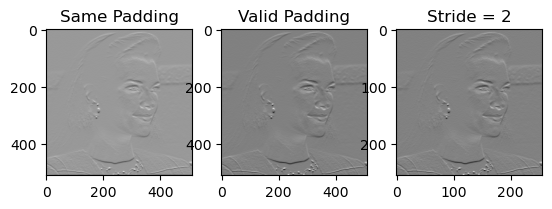

In [4]:
def convolve2d(input_image, kernel, stride=1, padding=0):
    # Add padding
    padded_image = np.pad(input_image, pad_width=padding, mode='constant', constant_values=0)
    
    output_height = (padded_image.shape[0] - kernel.shape[0]) // stride + 1
    output_width = (padded_image.shape[1] - kernel.shape[1]) // stride + 1
    output_image = np.zeros((output_height, output_width))
    
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = padded_image[i*stride:i*stride+kernel.shape[0], j*stride:j*stride+kernel.shape[1]]
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image

# Load image
image = cv2.imread('Fig0804.png', cv2.IMREAD_GRAYSCALE)

# Define kernel (simple edge detection)
kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Experiment with padding and stride
same_padded = convolve2d(image, kernel, padding=1)
valid_padded = convolve2d(image, kernel, padding=0)
stride2 = convolve2d(image, kernel, stride=2, padding=1)

# Plot results
plt.subplot(1, 3, 1)
plt.imshow(same_padded, cmap='gray')
plt.title('Same Padding')

plt.subplot(1, 3, 2)
plt.imshow(valid_padded, cmap='gray')
plt.title('Valid Padding')

plt.subplot(1, 3, 3)
plt.imshow(stride2, cmap='gray')
plt.title('Stride = 2')

plt.show()


## task 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


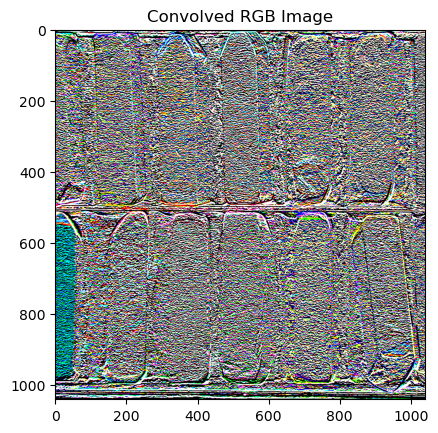

In [5]:
# Load the RGB image
image_rgb = cv2.imread('Fig0617.png')

# Split into R, G, B channels
r, g, b = cv2.split(image_rgb)

# Apply convolution on each channel
r_convolved = convolve2d(r, kernel, padding=1)
g_convolved = convolve2d(g, kernel, padding=1)
b_convolved = convolve2d(b, kernel, padding=1)

# Merge the processed channels
convolved_image = cv2.merge([r_convolved, g_convolved, b_convolved])

# Plot the results
plt.imshow(convolved_image)
plt.title('Convolved RGB Image')
plt.show()


## task 4

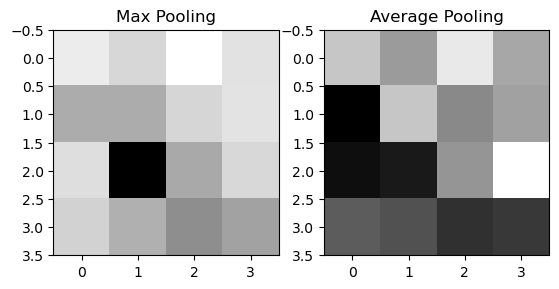

In [6]:
def max_pooling(feature_map, size=2, stride=2):
    output_height = (feature_map.shape[0] - size) // stride + 1
    output_width = (feature_map.shape[1] - size) // stride + 1
    output_map = np.zeros((output_height, output_width))
    
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = feature_map[i*stride:i*stride+size, j*stride:j*stride+size]
            output_map[i, j] = np.max(region)
    
    return output_map

def average_pooling(feature_map, size=2, stride=2):
    output_height = (feature_map.shape[0] - size) // stride + 1
    output_width = (feature_map.shape[1] - size) // stride + 1
    output_map = np.zeros((output_height, output_width))
    
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = feature_map[i*stride:i*stride+size, j*stride:j*stride+size]
            output_map[i, j] = np.mean(region)
    
    return output_map

# Generate a random feature map
feature_map = np.random.random((8, 8))

# Apply max pooling and average pooling
max_pooled = max_pooling(feature_map)
avg_pooled = average_pooling(feature_map)

# Plot results
plt.subplot(1, 2, 1)
plt.imshow(max_pooled, cmap='gray')
plt.title('Max Pooling')

plt.subplot(1, 2, 2)
plt.imshow(avg_pooled, cmap='gray')
plt.title('Average Pooling')

plt.show()


## task 5

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the LeNet model
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.pool = nn.MaxPool2d(2, 2)
    
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='D:\info\deep learning\data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)

# Initialize the model, loss function, and optimizer
model = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

# Evaluate and visualize predictions


<>:29: SyntaxWarning: invalid escape sequence '\i'
<>:29: SyntaxWarning: invalid escape sequence '\i'
C:\Users\17539\AppData\Local\Temp\ipykernel_32744\4088211769.py:29: SyntaxWarning: invalid escape sequence '\i'
  trainset = datasets.MNIST(root='D:\info\deep learning\data', train=True, download=True, transform=transform)


Epoch 1, Loss: 0.28624453311953696
Epoch 2, Loss: 0.058195116557367144
Epoch 3, Loss: 0.03846652666561228
Epoch 4, Loss: 0.03165276357594024
Epoch 5, Loss: 0.025176644836822137


In [11]:
testset = datasets.MNIST(root='D:\info\deep learning\data', train=False, download=True, transform=transform)
testloader = DataLoader(testset)

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\17539\AppData\Local\Temp\ipykernel_32744\1273776513.py:1: SyntaxWarning: invalid escape sequence '\i'
  testset = datasets.MNIST(root='D:\info\deep learning\data', train=False, download=True, transform=transform)


Accuracy on the test set: 98.86%
